<a href="https://colab.research.google.com/github/justin95214/logistic/blob/main/ice_cream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터 다운로드 받기

In [1]:
!git clone https://github.com/justin95214/logistic.git

fatal: destination path 'logistic' already exists and is not an empty directory.


2. 필요한 라이브러리 import 하기


In [2]:
#배열 관련 라이브러리
import numpy as np

#데이터프레임 라이브러리
import pandas as pd

#시간, 날짜 관련 라이브러리
from datetime import datetime

#그래프 관련 라이브러리
import matplotlib.pyplot as plt

#텐서플로우 딥러닝 모듈라이브러리
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

3. 다운로드 받은 경로에서 데이터 읽기

In [3]:

df= pd.read_csv("/content/logistic/yogurt.csv")

print(df.head(10))
print(df.tail(24))

        Date  Level
0   2010.1.1     57
1   2010.2.1     49
2   2010.3.1     64
3   2010.4.1     51
4   2010.5.1     59
5   2010.6.1     52
6   2010.7.1     36
7   2010.8.1     36
8   2010.9.1     32
9  2010.10.1     45
          Date  Level
84    2017.1.1     52
85    2017.2.1     47
86    2017.3.1     59
87    2017.4.1     57
88    2017.5.1     62
89    2017.6.1     42
90    2017.7.1     35
91    2017.8.1     26
92    2017.9.1     37
93   2017.10.1     33
94   2017.11.1     48
95   2017.12.1     47
96    2018.1.1     50
97    2018.2.1     52
98    2018.3.1     49
99    2018.4.1     56
100   2018.5.1     43
101   2018.6.1     38
102   2018.7.1     28
103   2018.8.1     24
104   2018.9.1     24
105  2018.10.1     33
106  2018.11.1     56
107  2018.12.1     45


4. 크기가 12인 사이즈의 윈도우 생성하기 12개씩 읽고 다음 날짜 데이터 예측


4-1 계절 12개월 주기 반영하도록 데이터 형태 변환하기

In [4]:

data = df['Level'].values
seq_len = 12
sequence_length = seq_len + 1

result = []
for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])


result

[array([57, 49, 64, 51, 59, 52, 36, 36, 32, 45, 73, 63, 45]),
 array([49, 64, 51, 59, 52, 36, 36, 32, 45, 73, 63, 45, 72]),
 array([64, 51, 59, 52, 36, 36, 32, 45, 73, 63, 45, 72, 65]),
 array([51, 59, 52, 36, 36, 32, 45, 73, 63, 45, 72, 65, 59]),
 array([59, 52, 36, 36, 32, 45, 73, 63, 45, 72, 65, 59, 75]),
 array([52, 36, 36, 32, 45, 73, 63, 45, 72, 65, 59, 75, 49]),
 array([36, 36, 32, 45, 73, 63, 45, 72, 65, 59, 75, 49, 34]),
 array([36, 32, 45, 73, 63, 45, 72, 65, 59, 75, 49, 34, 32]),
 array([32, 45, 73, 63, 45, 72, 65, 59, 75, 49, 34, 32, 33]),
 array([45, 73, 63, 45, 72, 65, 59, 75, 49, 34, 32, 33, 46]),
 array([73, 63, 45, 72, 65, 59, 75, 49, 34, 32, 33, 46, 46]),
 array([63, 45, 72, 65, 59, 75, 49, 34, 32, 33, 46, 46, 50]),
 array([45, 72, 65, 59, 75, 49, 34, 32, 33, 46, 46, 50, 57]),
 array([72, 65, 59, 75, 49, 34, 32, 33, 46, 46, 50, 57, 51]),
 array([65, 59, 75, 49, 34, 32, 33, 46, 46, 50, 57, 51, 51]),
 array([59, 75, 49, 34, 32, 33, 46, 46, 50, 57, 51, 51, 54]),
 array([

5. 항목별로 판매량 MinMaxScale하기 6. 데이터 분할하기 50 개 읽고 1개 예측 

In [5]:
normalized_data = []
#( X- (X의 최솟값) ) / ( X의 최댓값 - X의 최솟값 )
min_max_value_list = []

for window in result:
    normalized_window = [(p-min(window)) / (max(window) - min(window)) for p in window]
    min_max_value_list.append([min(window), max(window)])
    normalized_data.append(normalized_window)

result = np.array(normalized_data)
print(result)
print(result.shape)



[[0.6097561  0.41463415 0.7804878  ... 1.         0.75609756 0.31707317]
 [0.41463415 0.7804878  0.46341463 ... 0.75609756 0.31707317 0.97560976]
 [0.7804878  0.46341463 0.65853659 ... 0.31707317 0.97560976 0.80487805]
 ...
 [0.40625    0.28125    0.75       ... 0.125      0.         0.        ]
 [0.28125    0.75       0.71875    ... 0.         0.         0.28125   ]
 [0.75       0.71875    0.8125     ... 0.         0.28125    1.        ]]
(95, 13)


6. 데이터 분할하기

In [33]:
# split train and test data
row = -36
row1 = -23


train = result[:row, :]


np.random.shuffle(train)
x_train = train[:, :-1]
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row1:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row1:, -1]


####
train_standard = min_max_value_list[:row]
test_standard = min_max_value_list[row1:]

print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)
print(len(train_standard), len(test_standard))

(59, 12)
(59, 12, 1) (59,) (23, 12, 1) (23,)
59 23


7. 모델링에 필요한 라이브러리 import하기

In [7]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import SimpleRNN, Input, Dense, LSTM
from tensorflow.keras.layers import Bidirectional, TimeDistributed



In [223]:
#!pip install pyyaml h5py  # Required to save models in HDF5 format

checkpoint_filepath = './h57/cp.ckpt'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

8. 모델링

In [224]:
# 학습
model = Sequential()
model.add(SimpleRNN(24, return_sequences=True, input_shape=(seq_len, 1)))
model.add(SimpleRNN(121, return_sequences=True))
model.add(SimpleRNN(4, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

model.summary()





Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_107 (SimpleRNN)  (None, 12, 24)            624       
                                                                 
 simple_rnn_108 (SimpleRNN)  (None, 12, 121)           17666     
                                                                 
 simple_rnn_109 (SimpleRNN)  (None, 4)                 504       
                                                                 
 dense_33 (Dense)            (None, 1)                 5         
                                                                 
Total params: 18,799
Trainable params: 18,799
Non-trainable params: 0
_________________________________________________________________


9.모델 학습하기

In [225]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=6,
    epochs=150,
    callbacks=[model_checkpoint_callback])

Epoch 1/150
10/10 [==============================] - 3s 55ms/step - loss: 1.2429 - val_loss: 0.1864
Epoch 2/150
10/10 [==============================] - 0s 13ms/step - loss: 0.1004 - val_loss: 0.0935
Epoch 3/150
10/10 [==============================] - 0s 12ms/step - loss: 0.0616 - val_loss: 0.2499
Epoch 4/150
10/10 [==============================] - 0s 15ms/step - loss: 0.0970 - val_loss: 0.0813
Epoch 5/150
10/10 [==============================] - 0s 14ms/step - loss: 0.0768 - val_loss: 0.0521
Epoch 6/150
10/10 [==============================] - 0s 12ms/step - loss: 0.0840 - val_loss: 0.1180
Epoch 7/150
10/10 [==============================] - 0s 13ms/step - loss: 0.0677 - val_loss: 0.0792
Epoch 8/150
10/10 [==============================] - 0s 13ms/step - loss: 0.0513 - val_loss: 0.1042
Epoch 9/150
10/10 [==============================] - 0s 13ms/step - loss: 0.0498 - val_loss: 0.0654
Epoch 10/150
10/10 [==============================] - 0s 14ms/step - loss: 0.0593 - val_loss: 0.0729

In [226]:
model.load_weights(checkpoint_filepath)

10. 학습된 모델로 시계열데이터 예측하기

In [227]:
import matplotlib.dates as mdates
pred = model.predict(x_test)

11. 예측한 데이터 MinMaxScale로 0과 1로 변환된 데이터를 원래대로 복구하기

In [228]:

denormalized_data= [(p*(s[1] - s[0])+s[0])[0] for p, s in zip(pred, test_standard)]
denormalized_answer= [p*(s[1] - s[0])+s[0] for p, s in zip(y_test, test_standard)]

denormalized_data = np.round(denormalized_data,0)

print(len(denormalized_data),denormalized_data)
print(len(denormalized_answer),denormalized_answer)

23 [56. 54. 58. 51. 59. 42. 37. 28. 31. 41. 45. 44. 56. 47. 56. 51. 54. 38.
 32. 24. 34. 36. 45.]
23 [52.0, 47.0, 59.0, 57.0, 62.0, 42.0, 35.0, 26.0, 37.0, 33.0, 48.0, 47.0, 50.0, 52.0, 49.0, 56.0, 43.0, 38.0, 28.0, 24.0, 24.0, 33.0, 56.0]


12. 예측한 값과 정답값을 그래프로 표현하여 비교하기

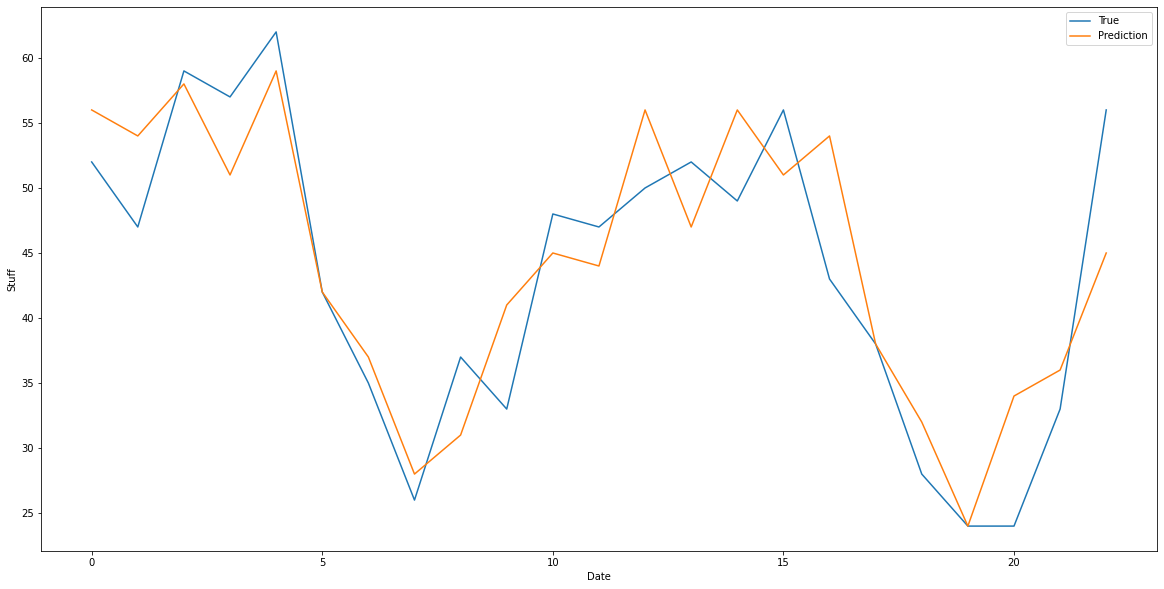

In [229]:

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(denormalized_answer, label='True')
ax.plot(denormalized_data, label='Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Stuff')
dateFmt = mdates.DateFormatter('%Y-%m-%d')
ax.legend()
plt.show()

12. 예측값과 실제값 오차 계산

 MAE (Mean Absolute Error) - 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
 https://ichi.pro/ko/chucheon-siseutem-eul-pyeong-gahaneun-bangbeob-ui-jeonche-moglog-183670080086494

In [230]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(denormalized_answer, denormalized_data)


4.6521739130434785

13. 엑셀로 예측값과 정답값을 저장하여 출력하기

In [231]:
csv_data = [[a,d] for a,d in zip(denormalized_answer, denormalized_data)]
temp_df = pd.DataFrame(csv_data, columns=["answer","predict"])
temp_df
temp_df.to_csv("/content/logistic/result.csv")